**Let's import the necessary Python modules and set the DATA_PATH**

In [1]:
%matplotlib inline
from datetime import datetime 
import pandas as pd 
from datetime import datetime 
from pathlib import Path 
DATA_PATH = Path('../datasets/chap5_data/')

**Read the using pandas and drop NA values**

In [2]:
walmart_stores = pd.read_csv(DATA_PATH/'1962_2006_walmart_store_openings.csv',  
            parse_dates=['date_super']).dropna() 

**Count the number of stores opened per year. We will use the store_count as time-series data**

In [3]:
walmart_store_count = walmart_stores.groupby("YEAR")[["storenum"]].agg("count")\
                                    .rename(columns={"storenum": "store_count"}) 

**Merge with walmart_stores**

In [4]:
walmart_store_count = pd.merge(walmart_stores, walmart_store_count, on="YEAR")

**Set the index with `date_super`**

In [5]:
walmart_store_count= walmart_store_count.set_index(pd.DatetimeIndex(walmart_store_count.date_super)) 

**Filter out the needed columns**

In [6]:
walmart_store_count = walmart_store_count[["date_super", "store_count"]] 
walmart_store_count.drop_duplicates(subset="date_super", inplace=True) 

**Print the DataFrame**

In [7]:
walmart_store_count.head(8)

,date_super,store_count
date_super,,
1997-03-01,1997-03-01,1
1996-03-01,1996-03-01,1
2002-03-01,2002-03-01,1
1993-03-01,1993-03-01,1
1998-03-01,1998-03-01,5
1994-03-01,1994-03-01,5
2002-02-20,2002-02-20,5
2000-03-01,2000-03-01,5


### Upsampling:

Upsampling helps to visualize and analyse data in more detail.

**Convert `walmart_store_count_series` to 2-days frequency.**

In [8]:
walmart_store_count_series = walmart_store_count.store_count
walmart_store_count_series = walmart_store_count_series.asfreq('2D')
walmart_store_count_series.head()

date_super
1997-03-01    1.0
1997-03-03    NaN
1997-03-05    NaN
1997-03-07    NaN
1997-03-09    NaN
Freq: 2D, Name: store_count, dtype: float64

**Interpolate the missing values using linear method**

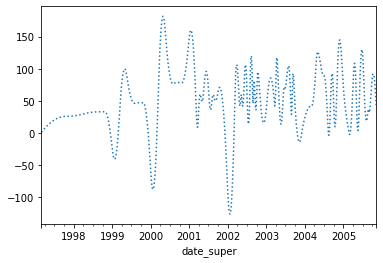

In [9]:
walmart_store_count_series = walmart_store_count_series.interpolate(method="spline", order=2) 
walmart_store_count_series.plot(style=":") 

### Downsampling:

It is an aggregation method for given frequency level. Downsampling to higher granularity of time(e.g. day to week) will introduce smoothing.

**Smoothen out the plot using downsampling with following code**

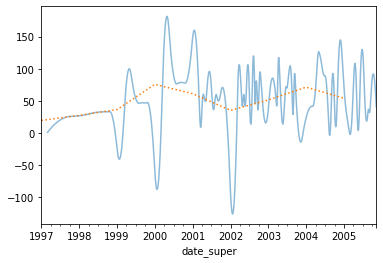

In [10]:
walmart_store_count_series.plot(alpha=0.5, style='-')
walmart_store_count_series.resample('BA').mean().plot(style=':') #BA stands for Business Year

**Downsample with frequency `Business-Quarter`**

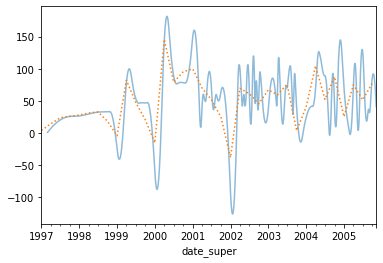

In [11]:
walmart_store_count_series.plot(alpha=0.5, style='-')
walmart_store_count_series.resample('BQ').mean().plot(style=':') #BQ stands for Business quater